#   Import Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

#   Load Dataset

In [2]:
df = pd.read_csv('bengaluru_house_prices.csv')
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB
None


# EDA

In [3]:
## Find if there are any missing values present
print(df.isnull().sum())

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64


In [4]:
pr = df.copy(deep = True)

In [5]:
## Filling Null values in columns- Bath & Balcony by Interpolation
pr['bath'] = pr['bath'].interpolate(method='linear')
pr['balcony'] = pr['balcony'].interpolate(method='linear')

In [6]:
## columns- society,size and location is in string data.We can't use interpolate. 
## We have to try different method
## Replace Null value in location column with "Location Not Provided"
pr['location'] = pr['location'].fillna('Location Not Provided')


In [7]:
## In Column-Size,Remove strings like Bedroom,BHK,RK. 
## Keep only numbers indicating the size.
pr["size"]= pr["size"].str.replace(r'\D', '')


C:\Users\INDIA\AppData\Local\Temp\ipykernel_7584\2820789314.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  pr["size"]= pr["size"].str.replace(r'\D', '')


In [8]:
### Remove Null Values in column-size
pr['size'] = pr.size.astype(float)
pr['size'] = pr['size'].interpolate(method='linear')

In [9]:
### Large data is missing in society column, so it is removed.
pr = pr.drop(['society'],axis=1)

In [10]:
### In Sq.ft column, removing unnecessary things like "-"
import re
x = pr["total_sqft"]
a = []
b = []
for i in x:
  if ' - ' in str(i):
    a.append(str(i))

for i in range(len(a)):
  txt=a[i]
  sp = re.split(" - ", txt)
  sum=float(sp[0])+float(sp[1])
  # print(sum/2)
  b.append(str(sum/2))

m = 0
for i in (x):
  if ' - ' in i:
    pr['total_sqft'].replace({i:b[m]}, inplace=True)
    m += 1
z = pr['total_sqft']

In [11]:
### Changing different Units to Sq.ft
for i in (pr["total_sqft"]):

  if 'Sq. Meter' in str(i):
    a=re.split("Sq. Meter", str(i))
    m=float(a[0])*10.763910
    pr['total_sqft'].replace({i:m}, inplace=True)
  
  elif 'Sq. Yards' in str(i):
    a=re.split("Sq. Yards", str(i))
    m=float(a[0])*9.0
    pr['total_sqft'].replace({i:m}, inplace=True)

  elif 'Perch' in str(i):
    a=re.split("Perch", str(i))
    m=float(a[0])*272.25
    pr['total_sqft'].replace({i:m}, inplace=True)

  elif 'Acres' in str(i):
    a=re.split("Acres", str(i))
    m=float(a[0])*43560.0
    pr['total_sqft'].replace({i:m}, inplace=True)

  elif 'Cents' in str(i):
    a=re.split("Cents", str(i))
    m=float(a[0])*435.61545
    pr['total_sqft'].replace({i:m}, inplace=True)

  elif 'Guntha' in str(i):
    a=re.split("Guntha", str(i))
    m=float(a[0])*1089.0
    pr['total_sqft'].replace({i:m}, inplace=True)

  elif 'Grounds' in str(i):
    a=re.split("Grounds", str(i))
    m=float(a[0])*2400.0
    pr['total_sqft'].replace({i:m}, inplace=True)

In [12]:
### Changing datatypes of sq.ft to float
pr['total_sqft'] = pr.total_sqft.astype(float)


In [13]:
## converting unique values in Area_type to 1,2,3,4 
## changing datatype to float

pr['area_type'].replace(to_replace=['Super built-up  Area', 'Plot  Area', 'Built-up  Area',
                'Carpet  Area'],value = [0,1,2,3],inplace=True)

pr['area_type'] = pr.area_type.astype(float)


In [14]:
## changing availability column to 0,1,2

def replace_availabilty(my_string):
    if my_string == 'Ready To Move':
        return 0
    elif my_string == 'Immediate Possession':
        return 1
    else:
        return 2

pr['availability'] = pr['availability'].apply(replace_availabilty)
pr['availability'] = pr.availability.astype(float)

In [15]:
## Applying label encoder to location column

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
pr['location']= le.fit_transform(pr['location'])
pr['location'] = pr.location.astype(float)

In [16]:
# Creating a column "Price_per_sqft" by converting price into lakhs and dividing it by total_sqft
pr['price_per_sqft'] = pr['price']*100000 / pr['total_sqft']  
print(pr.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   area_type       13320 non-null  float64
 1   availability    13320 non-null  float64
 2   location        13320 non-null  float64
 3   size            13320 non-null  float64
 4   total_sqft      13320 non-null  float64
 5   bath            13320 non-null  float64
 6   balcony         13320 non-null  float64
 7   price           13320 non-null  float64
 8   price_per_sqft  13320 non-null  float64
dtypes: float64(9)
memory usage: 936.7 KB
None


# Removing Outliers

In [17]:
import category_encoders as ce
percent10 = pr['price'].quantile(0.10)
percent90 = pr['price'].quantile(0.90)
pr_1 = pr[(pr['price'] > percent10) & (pr['price'] < percent90)]
print(pr_1.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10558 entries, 0 to 13317
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   area_type       10558 non-null  float64
 1   availability    10558 non-null  float64
 2   location        10558 non-null  float64
 3   size            10558 non-null  float64
 4   total_sqft      10558 non-null  float64
 5   bath            10558 non-null  float64
 6   balcony         10558 non-null  float64
 7   price           10558 non-null  float64
 8   price_per_sqft  10558 non-null  float64
dtypes: float64(9)
memory usage: 824.8 KB
None


# Feature Selection

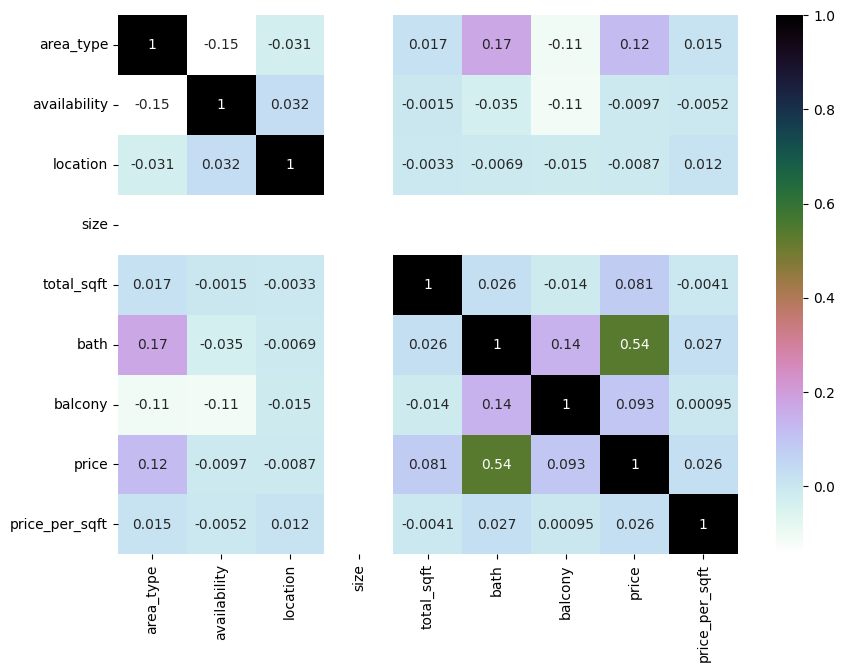

In [18]:
## Displaying Correlation values as Heatmap 
plt.figure(figsize=(10,7))
sns.heatmap(pr_1.corr(),annot=True,cmap='cubehelix_r')
plt.show()   
 

In [19]:
## Displaying Correlation values as text
cor = pr_1.corr()
print(cor) 

                area_type  availability  location  size  total_sqft      bath  \
area_type        1.000000     -0.145220 -0.031364   NaN    0.016855  0.168788   
availability    -0.145220      1.000000  0.032282   NaN   -0.001508 -0.035094   
location        -0.031364      0.032282  1.000000   NaN   -0.003326 -0.006942   
size                  NaN           NaN       NaN   NaN         NaN       NaN   
total_sqft       0.016855     -0.001508 -0.003326   NaN    1.000000  0.025958   
bath             0.168788     -0.035094 -0.006942   NaN    0.025958  1.000000   
balcony         -0.108642     -0.110545 -0.015108   NaN   -0.014400  0.141449   
price            0.122821     -0.009651 -0.008698   NaN    0.081023  0.535610   
price_per_sqft   0.014748     -0.005210  0.011554   NaN   -0.004136  0.027463   

                 balcony     price  price_per_sqft  
area_type      -0.108642  0.122821        0.014748  
availability   -0.110545 -0.009651       -0.005210  
location       -0.015108 -0.00

In [20]:
#Correlation with output variable
cor_target = abs(cor["price"])

#Selecting highly correlated features

relevant_features = cor_target[cor_target > 0.05]
print(relevant_features)       

area_type     0.122821
total_sqft    0.081023
bath          0.535610
balcony       0.093465
price         1.000000
Name: price, dtype: float64


In [21]:
#### Standardize Data to avoid Skewness
from sklearn.preprocessing import StandardScaler

x = pr_1[['bath','area_type','total_sqft','balcony','price_per_sqft']]
y = pr_1["price"]
sc = StandardScaler()
sc.fit(x)
X = sc.transform(x)


# Model Selection- Trying Different ML Algorithm

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [23]:
x1 = X
y1 = pr_1["price"]
train_x,test_x,train_y,test_y = train_test_split(x1,y1,test_size = 0.3,random_state=56)
print(train_x.shape)
print(test_x.shape)

(7390, 5)
(3168, 5)


In [24]:
##Linear Regression
regress = LinearRegression()
regress.fit(train_x, train_y)
predict = regress.predict(test_x)
print(regress.score(train_x,train_y))
print(regress.score(test_x,test_y))
print("Mean Absolute Error: ",mean_absolute_error(test_y, predict))

0.3065853187796481
0.21388291695542683
Mean Absolute Error:  26.132825139059324


In [27]:
### Support Vector Regression
vector = SVR(degree=5,kernel = 'rbf')
vector.fit(train_x, train_y)
pred_svr = vector.predict(test_x)
print(vector.score(train_x,train_y))
print(vector.score(test_x,test_y))
print("Mean Absolute Error: ",mean_absolute_error(test_y, pred_svr))


0.39816855625395364
0.3496708512738803
Mean Absolute Error:  23.211511394951085


In [31]:
### RandomForest Classifier
rfr = RandomForestRegressor()
rfr.fit(train_x,train_y)
predict_value = rfr.predict(test_x)
print(rfr.score(test_x,test_y))
print(rfr.score(train_x,train_y))     
print("Mean Squared Error: ",np.sqrt(mean_squared_error(test_y, predict_value)))
print("Mean Absolute Error: ",mean_absolute_error(test_y, predict_value))

0.9902714564813344
0.9989778002603042
Mean Squared Error:  4.013136927131533
Mean Absolute Error:  0.8646848642676759
